# HW3: Creating a Webapp 
###### In this blog post I will go over how to develop and create your own webapp
###### To start I created a github repository where I placed all my files, so I could easily commit and push any changes I have made

### Step 1: Creating the HTML files
##### To first start I created three HTML files, base.html, submit.html, and view.html. each one of them fullfill a diffrent porpose that I will explain below. 

#### Base.html 
This HTML code sets up the main page that opens up when you open the URL. Within the first page, you are displayed with the two links, to either see the message or to submit a message, as well as a list of random messages that have been submitted previously.

<!doctype html>
<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
<title>{% block title %}{% endblock %} - PIC16B Website</title>
<nav>
    
 /* this section changes the diffrent colors of the title*/
<style>
    h1 {
        color: blue;  /* Change the color of headers to blue */
    }
    h2{ color:red /*chnages the color of the second header to red*/

</style>
  <h1>Welcome to My Webapp!</h1>
  <p>Please follow the submit a message link to submit your message.</p>
  <!-- <b>Navigation:</b> -->
  <ul>
      /* this displays the two links on the main page, one to submit a message, and the second one to view the message*/ 
    <li><a href="/submit">Submit a Message</a></li>
    <li><a href="/message">View Messages</a></li>
  </ul>
</nav>
<section class="content">
  <header>
    {% block header %}{% endblock %}
  </header>
  {% block content %}{% endblock %}
</section>
<section>
    /* this is a secondary header that will show a list of the random messages */
  <h2>Random Messages:</h2>
  <ul>
   <!-- Iterate over each message in the 'messages' list -->
    {% for message in messages %}
    <!-- Display each message with its handle and content -->
    <li>{{ message[1] }}: {{ message[2] }}</li>
    {% endfor %}
  </ul>
</section>
</html>

#### Submit.html

This html takes care of the page in which indvdiuals submit their message. They are asked to provide their name and submit a message. Once submitting, they can then also chose to see any previous message or be directed to main page.

{% extends 'base.html' %}

{% block header %}
  <h1>{% block title %}Submit a Message{% endblock %}</h1>
{% endblock %}

{% block content %}
  <br> 
  /* this sets up the two links for people to either view the message or go back to the first main page */
  <li><a href="/submit">Return to main page</a><br>
  <li><a href="/message">View Messages</a></li>

  <br><br>
/* this will change the header to blue and the submit botton to green*/
  <style>
    h1 {
        color: blue;  /* Change the color of headers to blue */
    }
    input[type="submit"] {
        background-color: green;  /* Change the color of the submit button to green */
        color: black;  /* Change the text color of the submit button to white */
    }
  </style>
/* this section prompts the users to write their name and leave a message, and creates the submit botton*/
  <form method="post" action="/submit">
      <label for-"name"> Your name.</label><br>
      <input type="text" name="nm" /></br>
      <label for="message">Please write a message.</label><br>
      <input type="text" name="message" id="message"><br>
      <br><br>	
      <input type="submit" value="Submit Message">
  </form>

{% endblock %}

#### View.html
This last html presents the messages that have been submmited and orders them inside a table so it is easier to view past messages.


<!doctype html>
<html>
   <body>
      <h1>Below are your messages:</h1>
<style>
    h1 {
        color: blue;  /* Change the color of headers to blue */
    }
  </style>
      <table>
         <tr>
            <th>ID</th>
            <th>Name</th>
            <th>Message</th>
         </tr>
          /* this for loop goes through all the messages and organizes them inside a table */
         {% for message in messages %}
         <tr>
            <td>{{ message[0] }}</td>
            <td>{{ message[1] }}</td>
            <td>{{ message[2] }}</td>
         </tr>
         {% endfor %}
      </table>
       /* this creats a link that allows people to go back and submit another message*/
      <h2><a href = "\">submit another message</a></h2>
   </body>
</html>

### Step 2: Creat functions for data base mangment 

##### First we need  to import all the packages we might be using 

from flask import Flask, g, render_template, request
import sqlite3


import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

import io
import base64


First we start by creating a datavase and naming it as well as intializing flask applications.  The base function retrives 3 random messages and renders the base.html templetes, which also passes the messages to be displayed on the main page. The submit function tkaes the POST commend to add the message into the database. The submit.html templet is then rendered to prompt users to submit a message. Lastly, the message function retrives all the messages that were added to the database amd renders the view.html template which displays the messages to the users. 


"""
This script contains routes and functions for a Flask web application.

It defines routes for the main page, message submission, and viewing messages.
"""

DATABASE = 'messages_db.sqlite'
app = Flask(__name__)

 """
    Renders the main page of the web application.

    Retrieves 3 random messages and renders the 'base.html' template with these messages.
    """
@app.route('/')
def base():
    messages = random_messages(3)  # Retrieve 3 random messages
    return render_template('base.html', messages=messages)

  """
    Handles message submission.

    If the request method is POST, it inserts the message into the database.
    Renders the 'submit.html' template.
   """
@app.route('/submit', methods=['GET','POST'])
def submit():
    if request.method == 'POST':
        insert_message(request)
    return render_template('submit.html')

"""
    Displays all messages stored in the database.

    Retrieves all messages from the database and renders the 'view.html' template with these messages.
"""
@app.route('/message')
def message():
    db = get_message_db()
    cursor = db.cursor()
    cursor.execute("SELECT * FROM messages")
    messages = cursor.fetchall()
    cursor.close()
    return render_template('view.html', messages=messages)



This function then retrives trhe SQLite database connection used for storing the messages that were submitted by the users. 

In [ ]:
# Function to get the message database
"""
    Retrieve the SQLite database connection for storing messages.

    If the 'message_db' attribute is not present in the global 'g' object, 
    it creates a new connection to the SQLite database defined by the 
    'DATABASE' constant. It also creates a 'messages' table in the database 
    if it doesn't already exist.

    Returns:
    - sqlite3.Connection: The SQLite database connection object.
    """
def get_message_db():
    if 'message_db' not in g:
        g.message_db = sqlite3.connect(DATABASE)
        cursor = g.message_db.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS messages (
                            id INTEGER PRIMARY KEY,
                            handle TEXT,
                            message TEXT
                        )''')
        g.message_db.commit()
    return g.message_db
    



We then need to create a function that inserts the message into the database.It retracts the name of the user and their message from the form data using the request.form['nm'] and request.form['message'].Then, it executes an SQL query to insert the name and message into the 'messages' table in the database.

# Function to insert a user message into the database
def insert_message(request):
     """
    Insert a user message into the database.

    Args:
    - request (flask.request): The request object containing form data.

    Returns:
    - str: The message that was inserted into the database.
    """
    db = get_message_db()
    cursor = db.cursor()
    name = request.form['nm']
    message = request.form['message']
    cursor.execute("INSERT INTO messages (handle, message) VALUES (?, ?)", (name, message))
    db.commit()
    cursor.close()
    return message
 



Lastly, the last two functions  display the page that presents the list of random messages and randomizes the message that are being presented.

In [ ]:
@app.route('/view_messages')
def view_messages():
     """
    Display a page showing a random selection of messages.

    Returns:
    - flask.render_template: HTML page displaying the random messages.
    """
    messages = random_messages(5)  # You can change the number of messages to retrieve
    return render_template('view.html', messages=messages)

# Function to retrieve n random messages from the database
def random_messages(n):
    """
    Retrieve n random messages from the database.

    Args:
    - n (int): Number of random messages to retrieve.

    Returns:
    - list: A list of tuples containing the retrieved messages.
    """
    db = get_message_db()
    cursor = db.cursor()
    cursor.execute("SELECT * FROM messages ORDER BY RANDOM() LIMIT ?", (n,))
    messages = cursor.fetchall()
    cursor.close()
    db.close()  # Close the database connection
    return messages

#### Once we have wrote all the code and saved all the files we then run the following code in the terminal to publish the webapp and get the url for it 
set FLASK_ENV=app.py

flask run


#### Here is what my webapp looks like 

##### First is the main page the user sees when opening the URL 

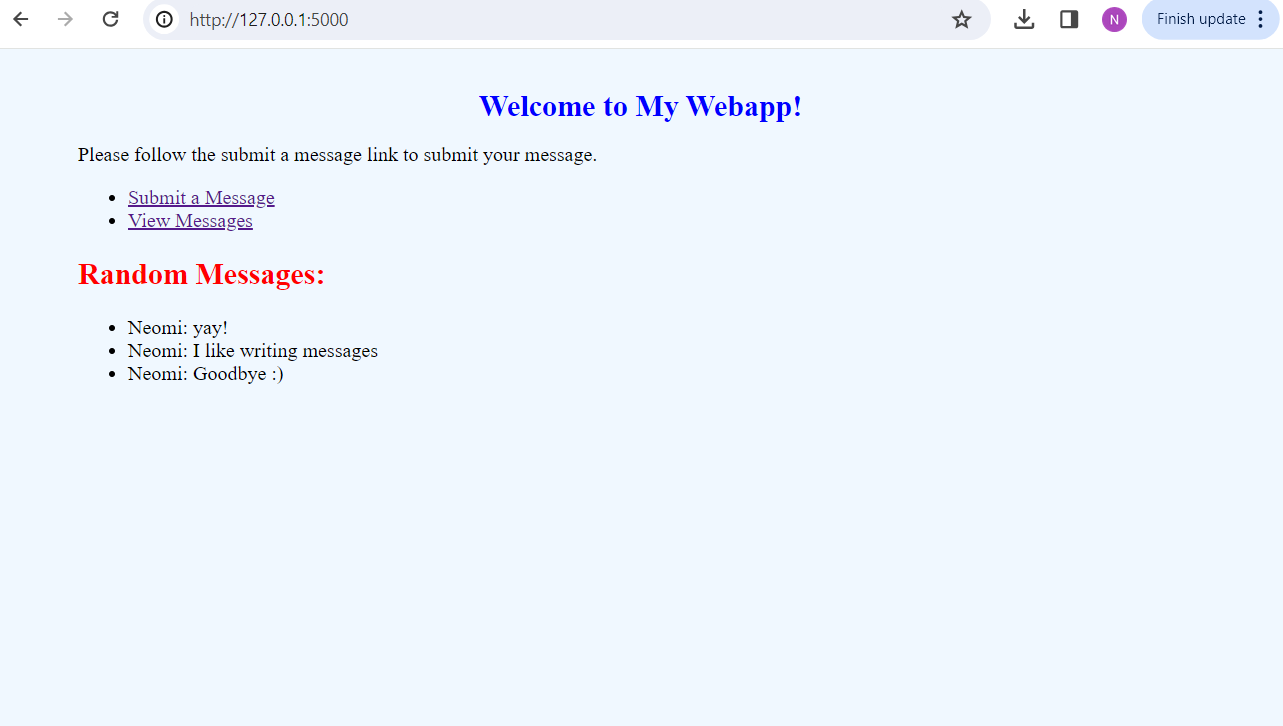

Once opening the submit a message url you are prompted to this page 


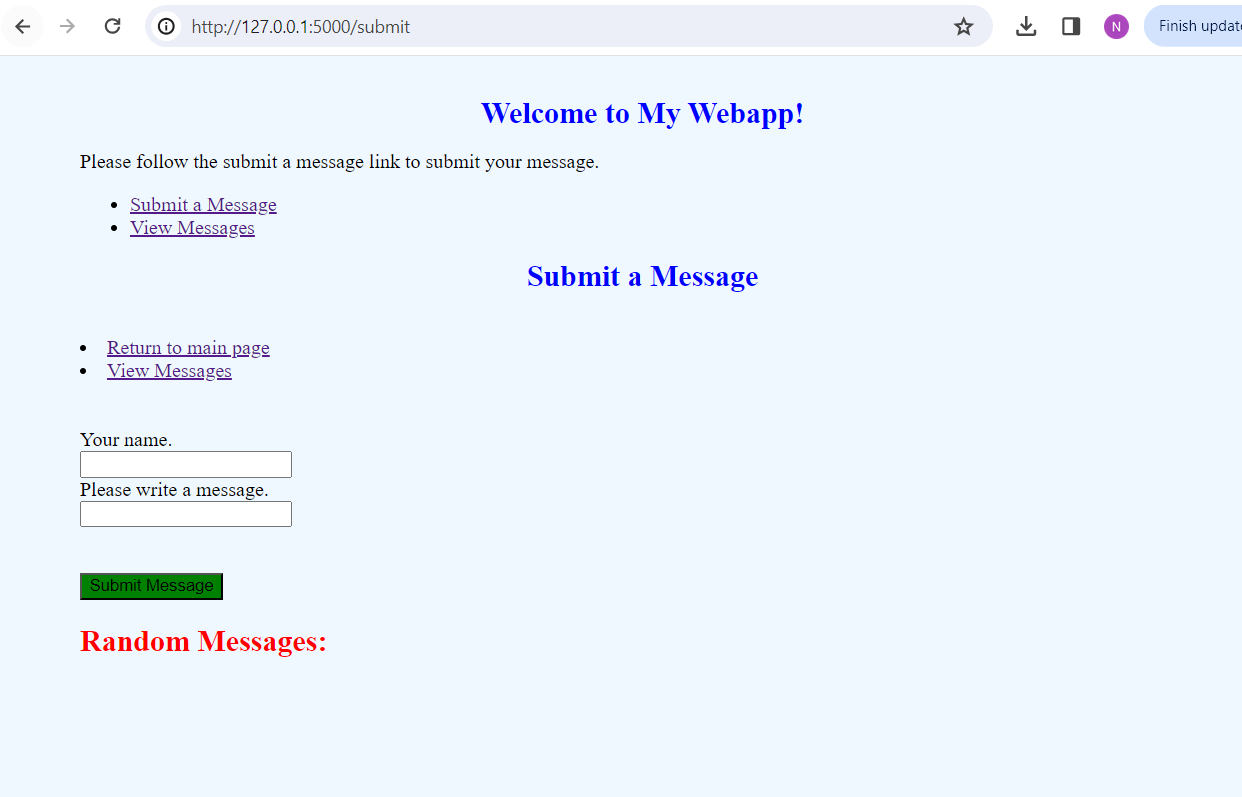

lastly, here is the list of message you can view once opining the view messages link 

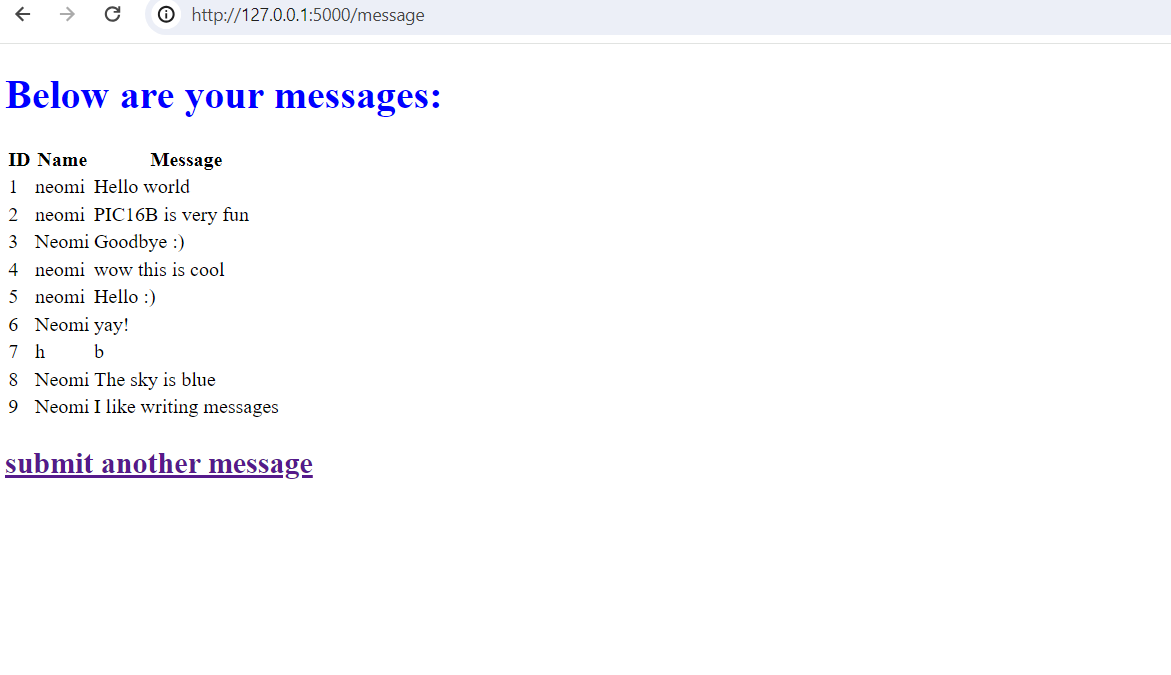


For the style of the page below is my style.css code 

html {
    font-family: Times New Roman;
    background: aliceblue;
    padding: 1rem;
}

body {
    background:aliceblue;
    font-family: Times New Roman;
    max-width: 900px;
    margin: 0 auto;
}

h1 {
    color: rgb(0, 0, 0);
    font-family: Times New Roman;
    margin: 1rem 0;
    text-align: center;
}
